Libary

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import nltk
import re
from nltk.corpus import stopwords
import string

Load data from source

In [6]:
data = pd.read_csv("F:\\Demo\\DataScience\\Python\\Projects\\Complaint-Classification\\artifacts\\data_ingestion\\consumercomplaints.csv")
data.columns = data.columns.str.replace(' ', '') 

In [7]:
data

,Unnamed:0,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumercomplaintnarrative
0,0,11/11/2022,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,11/23/2022,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,11/16/2022,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,11/15/2022,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,11/7/2022,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN
...,...,...,...,...,...,...,...
93,93,11/16/2022,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
94,94,11/22/2022,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN
95,95,11/20/2022,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN
96,96,11/16/2022,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN


In [11]:
#pip install bubbly

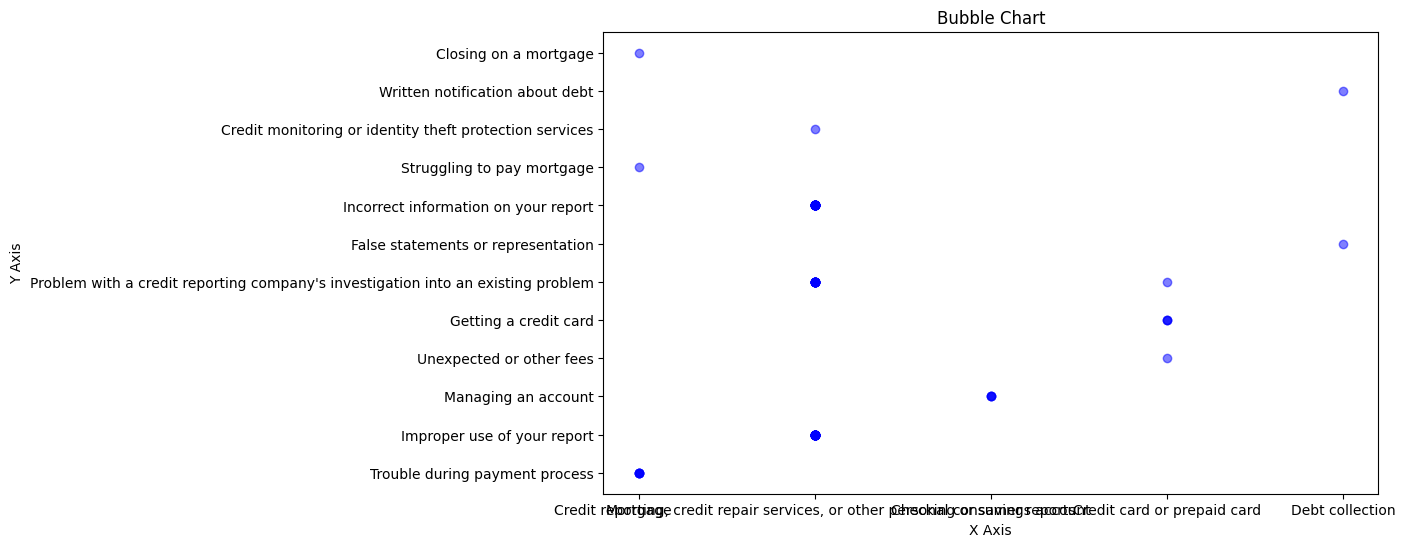

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bubble chart
plt.figure(figsize=(10,6))
plt.scatter(data['Product'], data['Issue'] ,alpha=0.5, color='b')
# plt.scatter(df['X'], df['Y'], s=df['Size'], alpha=0.5, color='b')
# Adding titles and labels
plt.title('Bubble Chart')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
# Display the plot
plt.show()




<h1>Basic Information On Data</h1>

In [13]:
print( data.info())
print("===============================")
print(data.describe())
print("===============================")
print(data.dtypes)
print("===============================")
print(len(data))
print("===============================")
missing_values = data.isnull().sum()
print("===============================")
print(missing_values)
print("===============================")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed:0                   98 non-null     int64 
 1   Datereceived                98 non-null     object
 2   Product                     98 non-null     object
 3   Sub-product                 98 non-null     object
 4   Issue                       98 non-null     object
 5   Sub-issue                   89 non-null     object
 6   Consumercomplaintnarrative  7 non-null      object
dtypes: int64(1), object(6)
memory usage: 5.5+ KB
None
       Unnamed:0
count  98.000000
mean   48.500000
std    28.434134
min     0.000000
25%    24.250000
50%    48.500000
75%    72.750000
max    97.000000
Unnamed:0                      int64
Datereceived                  object
Product                       object
Sub-product                   object
Issue                         object
S

In [8]:
data.shape

(98, 7)

<h1>Pull Data from Dataframe </h1>

In [14]:
#print(data.head(1))
#print("===============================")
#print(data.tail(1))
#data[[ 'Product','Issue','Date received' ]]
# unique values in column
data["Product"].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    79
Mortgage                                                                         8
Credit card or prepaid card                                                      5
Checking or savings account                                                      4
Debt collection                                                                  2
Name: count, dtype: int64

<h1>Data fram Projection</h1>

In [15]:
print(data.iloc[0:1] )
print(data.iloc[0:3,0:2] )
print(data[data["Product"]!="Mortgage"] )

   Unnamed:0 Datereceived   Product                 Sub-product  \
0          0   11/11/2022  Mortgage  Conventional home mortgage   

                            Issue Sub-issue Consumercomplaintnarrative  
0  Trouble during payment process       NaN                        NaN  
   Unnamed:0 Datereceived
0          0   11/11/2022
1          1   11/23/2022
2          2   11/16/2022
    Unnamed:0 Datereceived                                            Product  \
1           1   11/23/2022  Credit reporting, credit repair services, or o...   
3           3   11/15/2022                        Checking or savings account   
5           5   11/13/2022  Credit reporting, credit repair services, or o...   
6           6    11/7/2022  Credit reporting, credit repair services, or o...   
7           7   11/11/2022                        Credit card or prepaid card   
..        ...          ...                                                ...   
93         93   11/16/2022  Credit reporting, cr

<h1>Data Cleanup</h1>

In [16]:
print(data.isnull().sum())


Unnamed:0                      0
Datereceived                   0
Product                        0
Sub-product                    0
Issue                          0
Sub-issue                      9
Consumercomplaintnarrative    91
dtype: int64


In [17]:
len(data)

98

In [18]:
data = data.dropna()

In [19]:
len(data)

5

In [20]:
print(data["Product"].value_counts())

Product
Credit reporting, credit repair services, or other personal consumer reports    3
Checking or savings account                                                     1
Debt collection                                                                 1
Name: count, dtype: int64


In [21]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\home\AppData\Local\Temp\ipykernel_14360\1527591474.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\home\AppData\Local\Temp\ipykernel_14360\1527591474.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\home\AppData\Local\Temp\ipykernel_14360\1527591474.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [23]:
data["Consumercomplaintnarrative"] = data["Consumercomplaintnarrative"].apply(clean)

C:\Users\home\AppData\Local\Temp\ipykernel_14360\473588763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Consumercomplaintnarrative"] = data["Consumercomplaintnarrative"].apply(clean)


In [24]:
#data["Consumercomplaintnarrative"]

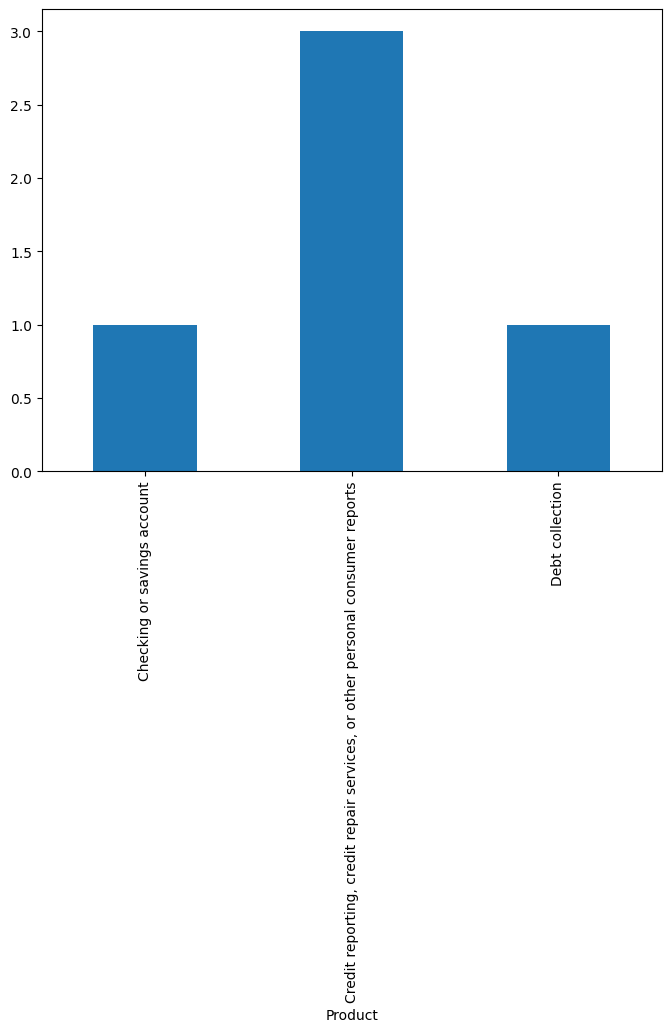

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('Product').Consumercomplaintnarrative.count().plot.bar()
plt.show()

In [26]:
#pip install bubbly

In [1]:
data.head()

NameError: name 'data' is not defined

In [28]:
data = data[["Consumercomplaintnarrative", "Product"]]
x = np.array(data["Consumercomplaintnarrative"])
y = np.array(data["Product"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [29]:
sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)

SGDClassifier()

In [30]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = sgdmodel.predict(data)
print(output)